In [1]:
#!/usr/bin/env python
# coding: utf-8

# # Hopfield Network

# Developer: Thiago Fellipe Ortiz de Camargo

# ## Standard Imports

# In[3]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# ## Examples

# In[332]:


N1 = np.array((-1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1))
N2 = np.array((1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1))
N3 = np.array((1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1))
N4 = np.array((1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1))
N = np.array((N1, N2, N3, N4))


In [3]:
class hopfield(object):
    
    def __init__(self, patterns, noise_percentage, pattern_n_row, pattern_n_column, ib, epochs):
        self.patterns = patterns
        self.noise    = 1-noise_percentage
        self.nrow     = pattern_n_row
        self.ncol     = pattern_n_column
        self.fmn      = len(patterns)
        self.dim      = len(self.patterns[0])
        self.ib       = ib
        self.epc      = epochs
        self.scape    = False
        
    def noise_attribution(self, patt):
        self.pattern = patt
        self.randM   = np.random.rand(self.nrow,self.ncol)
        self.auxA    = self.noise > self.randM
        self.auxB    = self.noise < self.randM
        self.randM[self.auxA] =  1
        self.randM[self.auxB] = -1
        self.new_patter       = self.pattern.reshape(self.nrow,self.ncol)*self.randM
        return self.new_patter.reshape(self.dim,1)
    
    def weights(self):
        self.auxW = 0
        
        for patt in self.patterns:
            self.auxW += patt*patt.reshape(self.dim,1)
            
        self.W = ((1/self.dim)*self.auxW)-((self.fmn/self.dim)*np.zeros((self.dim,self.dim)))
        
    
    def run(self):
        
        self.outputs    = pd.DataFrame()
        self.noised_img = pd.DataFrame()
        for patt, i in zip(self.patterns,range(self.fmn)):
            self.weights()
            self.v_current  = self.noise_attribution(patt)
            self.noised_img = pd.concat((self.noised_img, pd.DataFrame(self.v_current).T))
            self.it = 0
            self.scape = False

            while(self.scape == False):
                self.v_past    = self.v_current
                self.u         = np.dot(self.W,self.v_past)+self.ib
                self.v_current = np.sign(np.tanh(self.u))

                if pd.DataFrame(self.v_current).equals(pd.DataFrame(self.v_past)):
                    self.scape = True

                if(self.it >= self.epc):
                    self.scape = True

                self.it += 1
                
            self.outputs = pd.concat((self.outputs,pd.DataFrame(self.v_current).T))


In [4]:
# In[333]:


hp = hopfield(patterns=N, noise_percentage=0.15, 
              pattern_n_row=9, pattern_n_column=5, ib=0, epochs=1000)
hp.run()

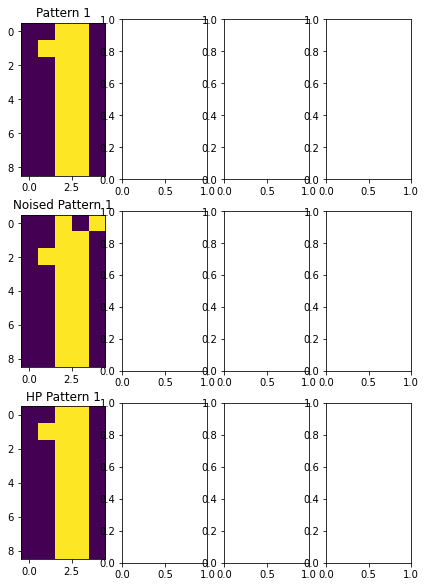

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(7, 10))

# ------- N1 -------
axs[0][0].set_title('Pattern 1')
axs[0][0].imshow(N1.reshape(9,5))

axs[1][0].set_title('Noised Pattern 1')
axs[1][0].imshow(hp.noised_img.iloc[0,:].values.reshape(9,5))

axs[2][0].set_title('HP Pattern 1')
axs[2][0].imshow(hp.outputs.iloc[0,:].values.reshape(9,5))


In [6]:

# ------- N2 -------
axs[0][1].set_title('Pattern 2')
axs[0][1].imshow(N2.reshape(9,5))

axs[1][1].set_title('Noised Pattern 2')
axs[1][1].imshow(hp.noised_img.iloc[1,:].values.reshape(9,5))

axs[2][1].set_title('HP Pattern 2')
axs[2][1].imshow(hp.outputs.iloc[1,:].values.reshape(9,5))

In [7]:
# ------- N3 -------
axs[0][2].set_title('Pattern 3')
axs[0][2].imshow(N3.reshape(9,5))

axs[1][2].set_title('Noised Pattern 3')
axs[1][2].imshow(hp.noised_img.iloc[2,:].values.reshape(9,5))

axs[2][2].set_title('HP Pattern 3')
axs[2][2].imshow(hp.outputs.iloc[2,:].values.reshape(9,5))


In [8]:
# ------- N4 -------
axs[0][3].set_title('Pattern 4')
axs[0][3].imshow(N4.reshape(9,5))

axs[1][3].set_title('Noised Pattern 4')
axs[1][3].imshow(hp.noised_img.iloc[3,:].values.reshape(9,5))

axs[2][3].set_title('HP Pattern 4')
axs[2][3].imshow(hp.outputs.iloc[3,:].values.reshape(9,5))

In [10]:
plt.show()